## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px

## Set url and fetch data with a column called Position
Returns a list of tables - the one we want is index 0

But the 2020-21Position colum is not parsed correctly - it begins with a number but als o containd letters e.g. 1st

lxml is causing this problen so change parser to bs4

In [2]:
url="https://en.wikipedia.org/wiki/Premier_League"

In [3]:
infotable = pd.read_html(url,match="Position")
infotable[0].head()

,2021–22Club,2020–21Position,First season intop division,First season inPremier League,Seasonsin topdivision,Seasonsin PremierLeague,First season ofcurrent spell intop division,No. of seasonsof current spellin Premier League,Topdivisiontitles,Mostrecent topdivision title
0,Arsenal[a][b],NaN,1904–05,1992–93,105,30,1919–20,30,13,2003–04
1,Aston Villa[a][c],NaN,1888–89,1992–93,108,27,2019–20,3,7,1980–81
2,Brentford[b],CS),1935–36,2021–22,6,1,2021–22,1,0,–
3,Brighton & Hove Albion[b],NaN,1979–80,2017–18,9,5,2017–18,5,0,–
4,Burnley[c],NaN,1888–89,2009–10,59,8,2016–17,6,2,1959–60


# Fetch data but using bs4

In [4]:
infotable = pd.read_html(url,match="Position",flavor='bs4')

In [5]:
infotable=infotable[0]
infotable.head()

,2021–22Club,2020–21Position,First season intop division,First season inPremier League,Seasonsin topdivision,Seasonsin PremierLeague,First season ofcurrent spell intop division,No. of seasonsof current spellin Premier League,Topdivisiontitles,Mostrecent topdivision title
0,Arsenal[a][b],8th,1904–05,1992–93,105,30,1919–20,30,13,2003–04
1,Aston Villa[a][c],11th,1888–89,1992–93,108,27,2019–20,3,7,1980–81
2,Brentford[b],3rd (CS),1935–36,2021–22,6,1,2021–22,1,0,–
3,Brighton & Hove Albion[b],16th,1979–80,2017–18,9,5,2017–18,5,0,–
4,Burnley[c],17th,1888–89,2009–10,59,8,2016–17,6,2,1959–60


# Assume we don't need the notes in the Club column
we could keep this data as we will see later but, for now let's just edit them out

In [6]:
infotable['2021–22Club'] = infotable['2021–22Club'].replace('\[.\]','',regex=True)


# Sort by Seasons in top division

In [7]:
infotable.sort_values('Seasonsin topdivision', ascending=False)

,2021–22Club,2020–21Position,First season intop division,First season inPremier League,Seasonsin topdivision,Seasonsin PremierLeague,First season ofcurrent spell intop division,No. of seasonsof current spellin Premier League,Topdivisiontitles,Mostrecent topdivision title
7,Everton,10th,1888–89,1992–93,119,30,1954–55,30,9,1986–87
1,Aston Villa,11th,1888–89,1992–93,108,27,2019–20,3,7,1980–81
10,Liverpool,3rd,1894–95,1992–93,107,30,1962–63,30,19,2019–20
0,Arsenal,8th,1904–05,1992–93,105,30,1919–20,30,13,2003–04
12,Manchester United,2nd,1892–93,1992–93,97,30,1975–76,30,20,2012–13
11,Manchester City,1st,1899–1900,1992–93,93,25,2002–03,20,7,2020–21
13,Newcastle United,12th,1898–99,1993–94,90,27,2017–18,5,4,1926–27
5,Chelsea,4th,1907–08,1992–93,87,30,1989–90,30,6,2016–17
16,Tottenham Hotspur,7th,1909–10,1992–93,87,30,1978–79,30,2,1960–61
19,Wolverhampton Wanderers,13th,1888–89,2003–04,67,8,2018–19,4,3,1958–59


Everton is the team that has been in the top league for the longest

# In the Position column we have ordinal number that are seen as strings by bs4
also the teams that were promoted from the league below have (CS) after there position
We can easily get rid of the text using the same technique as before, but let's not because then we'll end up with two teams each of which are 1st 2nd and 3rd
So create a new column Promoted and set them True of False depending on whether there is a (CS)

Then we'll edit out the unwanted characters

And now we can order the teams bu position

In [8]:
infotable['Promoted'] = infotable['2020–21Position'].str.contains('CS')
infotable['2020–21Position'] = infotable['2020–21Position'].replace('\(CS\)','',regex=True)
infotable['2020–21Position'] = infotable['2020–21Position'].replace('th','',regex=True)
infotable['2020–21Position'] = infotable['2020–21Position'].replace('rd','',regex=True)
infotable['2020–21Position'] = infotable['2020–21Position'].replace('nd','',regex=True)
infotable['2020–21Position'] = infotable['2020–21Position'].replace('st','',regex=True)
infotable['2020–21Position'] = infotable['2020–21Position'].astype('int64')
infotable[infotable['Promoted']==False].sort_values('2020–21Position')


,2021–22Club,2020–21Position,First season intop division,First season inPremier League,Seasonsin topdivision,Seasonsin PremierLeague,First season ofcurrent spell intop division,No. of seasonsof current spellin Premier League,Topdivisiontitles,Mostrecent topdivision title,Promoted
11,Manchester City,1,1899–1900,1992–93,93,25,2002–03,20,7,2020–21,False
12,Manchester United,2,1892–93,1992–93,97,30,1975–76,30,20,2012–13,False
10,Liverpool,3,1894–95,1992–93,107,30,1962–63,30,19,2019–20,False
5,Chelsea,4,1907–08,1992–93,87,30,1989–90,30,6,2016–17,False
9,Leicester City,5,1908–09,1994–95,53,16,2014–15,8,1,2015–16,False
18,West Ham United,6,1923–24,1993–94,64,26,2012–13,10,0,–,False
16,Tottenham Hotspur,7,1909–10,1992–93,87,30,1978–79,30,2,1960–61,False
0,Arsenal,8,1904–05,1992–93,105,30,1919–20,30,13,2003–04,False
8,Leeds United,9,1924–25,1992–93,52,14,2020–21,2,3,1991–92,False
7,Everton,10,1888–89,1992–93,119,30,1954–55,30,9,1986–87,False


# Another table

The final league table for 2020-21

Not much editing required here

In [9]:
# 2020-21 season
url="https://en.wikipedia.org/wiki/2020%E2%80%9321_Premier_League"
leaguetable = pd.read_html(url,match="Pos")
leaguetable=leaguetable[1]


# plot
goal for 
goals against
win/draw/lose

In [10]:
leaguetable

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,1,Manchester City (C),38,27,5,6,83,32,+51,86,Qualification for the Champions League group s...
1,2,Manchester United,38,21,11,6,73,44,+29,74,Qualification for the Champions League group s...
2,3,Liverpool,38,20,9,9,68,42,+26,69,Qualification for the Champions League group s...
3,4,Chelsea,38,19,10,9,58,36,+22,67,Qualification for the Champions League group s...
4,5,Leicester City,38,20,6,12,68,50,+18,66,Qualification for the Europa League group stag...
5,6,West Ham United,38,19,8,11,62,47,+15,65,Qualification for the Europa League group stag...
6,7,Tottenham Hotspur,38,18,8,12,68,45,+23,62,Qualification for the Europa Conference League...
7,8,Arsenal,38,18,7,13,55,39,+16,61,NaN
8,9,Leeds United,38,18,5,15,62,54,+8,59,NaN
9,10,Everton,38,17,8,13,47,48,−1,59,NaN


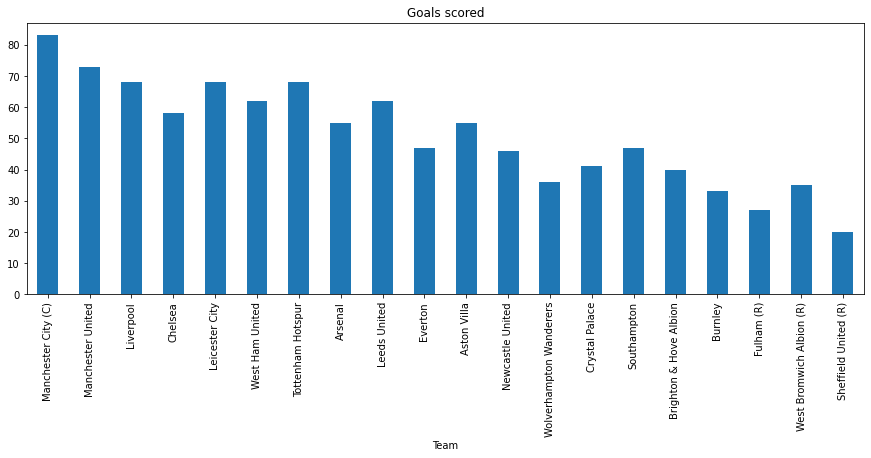

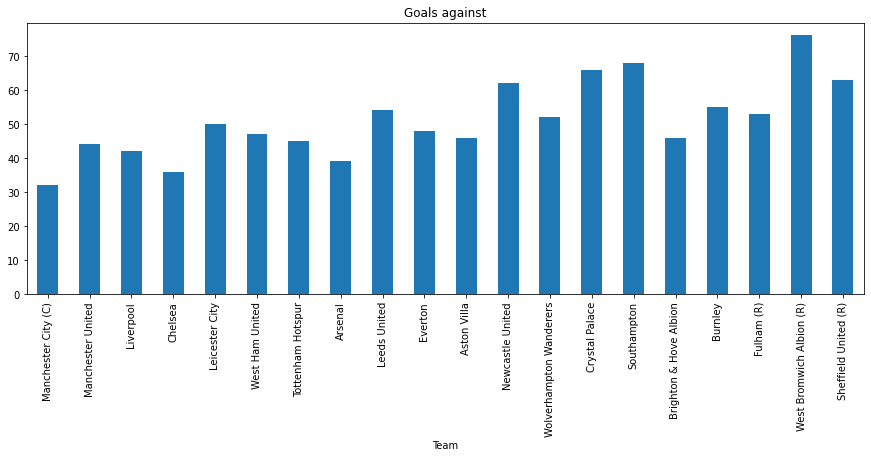

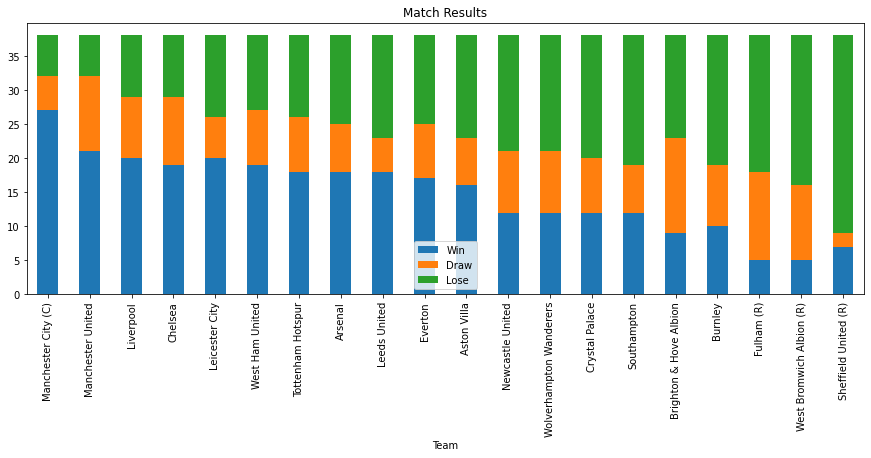

In [11]:
leaguetable.plot.bar(x='Team',
                     y='GF', 
                     title='Goals scored', 
                     legend=False,figsize=(15,5));
leaguetable.plot.bar(x='Team',
                     y='GA', 
                     title='Goals against', 
                     legend=False, 
                     figsize=(15,5));
leaguetable.plot.bar(x='Team',
                     y=['W','D','L'], 
                     stacked=True, 
                     title='Match Results', 
                     legend=False,
                     figsize=(15,5)
                     ).legend(['Win','Draw','Lose'],loc='lower center');



In [12]:
fig=px.bar(leaguetable,x='Team',y='GF')
fig.show()
fig=px.bar(leaguetable,x='Team',y='GA')
fig.show()
fig=px.bar(leaguetable,x='Team',y=['W','D','L'])
fig.show()
